## FI6161 Part B - Week 2
1) Make a nice stock graph
2) Using your graph, describe what you see. Try graph the Open stock prices and compare results
2) Create the following functions, Mean, Max & Min, for close prices



https://towardsdatascience.com/a-comprehensive-guide-to-downloading-stock-prices-in-python-2cd93ff821d4

***

## A. Importing Modules and Dataset

#### Required Pacakges

`pip install yfinance` 

`pip install yahoofinancials`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf # pip install yfinance if necessary
from yahoofinancials import YahooFinancials

Python includes a powerful data handling library -> Panda Dataframes. We import this by using the command `import pandas as pd`. You'll begin to see this library import more frequently throughout this module and course, so I recommend getting familiar with it.

Here is a simple tutorial you can follow to get up to speed! https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

So to begin, we simply pull stock data from Microsoft, Google & Apple from 2021-02-11 -> 2021-10-25

In [3]:
tickers = ['MSFT', 'GOOGL', 'AAPL']
stocks_df = yf.download(tickers,
                      start='2021-02-11', 
                      end='2021-10-25', 
                      progress=False)

***

## B. View and graph stock data

Once we've downloaded the stock data, we can view the pandas dataframe using the head method. This command looks at the top `n` rows of our dataframe

***

In [4]:
stocks_df.head(10)

Adj Close                                Close               \
                  AAPL        GOOGL        MSFT        AAPL        GOOGL   
Date                                                                       
2021-02-10  134.761536  2086.479980  241.242081  135.389999  2086.479980   
2021-02-11  134.502747  2088.750000  242.901230  135.130005  2088.750000   
2021-02-12  134.741623  2095.030029  243.397995  135.369995  2095.030029   
2021-02-16  132.571747  2110.699951  242.116348  133.190002  2110.699951   
2021-02-17  130.232651  2118.620117  243.171890  130.839996  2118.620117   
2021-02-18  129.107910  2105.810059  242.763611  129.710007  2105.810059   
2021-02-19  129.267151  2088.810059  239.955490  129.869995  2088.810059   
2021-02-22  125.415123  2054.260010  233.522675  126.000000  2054.260010   
2021-02-23  125.275772  2060.120117  232.287903  125.860001  2060.120117   
2021-02-24  124.768143  2083.810059  233.562515  125.349998  2083.810059   

                              High                                  Low  \
                  MSFT        AAPL        GOOGL        MSFT        AAPL   
Date                                                                      
2021-02-10  242.820007  136.990005  2098.879883  245.919998  134.399994   
2021-02-11  244.490005  136.389999  2094.000000  245.149994  133.770004   
2021-02-12  244.990005  135.529999  2099.500000  245.300003  133.690002   
2021-02-16  243.699997  136.009995  2145.139893  246.130005  132.789993   
2021-02-17  244.199997  132.220001  2122.439941  244.309998  129.470001   
2021-02-18  243.789993  130.000000  2121.989990  243.929993  127.410004   
2021-02-19  240.970001  130.710007  2118.580078  243.860001  128.800003   
2021-02-22  234.509995  129.720001  2080.330078  237.929993  125.599998   
2021-02-23  233.270004  126.709999  2072.500000  234.830002  118.389999   
2021-02-24  234.550003  125.559998  2088.320068  235.199997  122.230003   

                                           Open                           \
                  GOOGL        MSFT        AAPL        GOOGL        MSFT   
Date                                                                       
2021-02-10  2052.239990  240.889999  136.479996  2083.139893  245.000000   
2021-02-11  2068.860107  242.149994  135.899994  2091.000000  244.779999   
2021-02-12  2073.570068  242.729996  134.350006  2079.770020  243.929993   
2021-02-16  2091.750000  242.919998  135.490005  2091.750000  245.029999   
2021-02-17  2088.350098  240.940002  131.250000  2093.979980  241.320007   
2021-02-18  2093.330078  240.860001  129.199997  2105.000000  241.800003   
2021-02-19  2083.429932  240.179993  130.240005  2107.790039  243.750000   
2021-02-22  2048.000000  232.399994  128.009995  2053.600098  237.419998   
2021-02-23  1990.229980  228.729996  123.760002  2013.989990  230.330002   
2021-02-24  2027.530029  229.000000  124.940002  2030.040039  230.009995   

               Volume                     
                 AAPL    GOOGL      MSFT  
Date                                      
2021-02-10   73046600  1255100  22186700  
2021-02-11   64280000  1024000  15751100  
2021-02-12   60145100   949500  16561100  
2021-02-16   80576300  1550200  26728500  
2021-02-17   97918500  1014700  21653500  
2021-02-18   96856700  1127300  16925600  
2021-02-19   87668800  1896900  25262600  
2021-02-22  103916400  1473300  36446900  
2021-02-23  158273000  1732900  30228700  
2021-02-24  111039900  1130400  26339700

***

Pandas allow us to easily view the data in detail using the .describe() command. There are 177 datapoints or rows in this dataset.

***

In [5]:
stocks_df.describe()

Adj Close                                Close               \
             AAPL        GOOGL        MSFT        AAPL        GOOGL   
count  178.000000   178.000000  178.000000  178.000000   178.000000   
mean   135.799990  2459.969609  267.134166  136.206573  2459.969609   
std     10.533752   282.869300   25.074621   10.430721   282.869300   
min    115.819870  2007.500000  225.775436  116.360001  2007.500000   
25%    126.014502  2252.997498  245.576504  126.387497  2252.997498   
50%    133.840836  2435.689941  260.657959  134.464996  2435.689941   
75%    145.815025  2730.390076  289.221321  146.082497  2730.390076   
max    156.461655  2904.310059  310.760010  156.690002  2904.310059   

                         High                                  Low  \
             MSFT        AAPL        GOOGL        MSFT        AAPL   
count  178.000000  178.000000   178.000000  178.000000  178.000000   
mean   267.721854  137.446910  2478.292411  269.572696  134.861685   
std     24.715141   10.355137   281.638505   24.525556   10.423276   
min    226.729996  120.400002  2037.040039  232.470001  116.209999   
25%    246.472500  127.785000  2272.335022  248.542500  125.307499   
50%    261.759995  135.440002  2446.569946  262.815002  133.345001   
75%    289.775002  147.095005  2753.007446  291.357491  145.232498   
max    310.760010  157.259995  2925.080078  311.089996  154.389999   

                                      Open                           \
             GOOGL        MSFT        AAPL        GOOGL        MSFT   
count   178.000000  178.000000  178.000000   178.000000  178.000000   
mean   2438.095509  265.449101  136.164158  2458.421514  267.429888   
std     283.301194   24.628267   10.362340   283.866621   24.661222   
min    1990.229980  224.259995  119.029999  2013.989990  226.740005   
25%    2236.330017  244.067501  126.537498  2251.772522  246.315002   
50%    2418.479980  259.434998  134.815002  2433.380005  260.894989   
75%    2706.700012  287.375000  145.907501  2729.059998  289.322495   
max    2897.669922  307.799988  156.979996  2904.320068  310.399994   

             Volume                              
               AAPL         GOOGL          MSFT  
count  1.780000e+02  1.780000e+02  1.780000e+02  
mean   8.682414e+07  1.428946e+06  2.492533e+07  
std    2.600728e+07  5.377660e+05  7.008453e+06  
min    4.639770e+07  7.151000e+05  1.390020e+07  
25%    6.874502e+07  1.086625e+06  1.962120e+07  
50%    8.138955e+07  1.297150e+06  2.363905e+07  
75%    1.005930e+08  1.601375e+06  2.789332e+07  
max    1.855495e+08  4.756500e+06  4.690310e+07

***

Before we plot the data for comparison, we need to normalize the data. 

Can you think of a reason why? Try and plot the data without normalizing first and explain why we need to normalize the data.

***

In [6]:
def normalize_stocks(df):
    """
    Method to normalize stock data. We use the command iloc here to slice through the stock dataset and return the first row. 
    We then divide the dataset by the first row, resetting the inital price to $1 for each stock
    """
    return df/df.iloc[0,:]

***

Pandas allow us to simply plot our data using the plot method. We can title the plot and change the size colour etc. 

You can find more information on plotting here: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

***

<AxesSubplot:title={'center':'Stock Prices'}, xlabel='Date'>

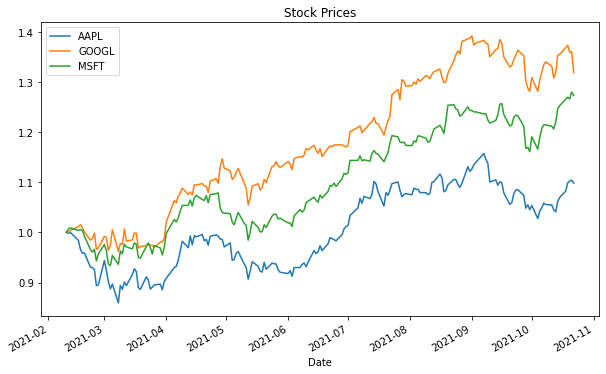

In [7]:
norm_stocks = normalize_stocks(stocks_df)
norm_stocks['Close'].plot(title="Stock Prices", figsize=(10, 6))

***

The plot above is very simple. We can plot each close price per 'axes' (each stock/ticker in the close price per plot) individually for a deeper insight into our data.

***

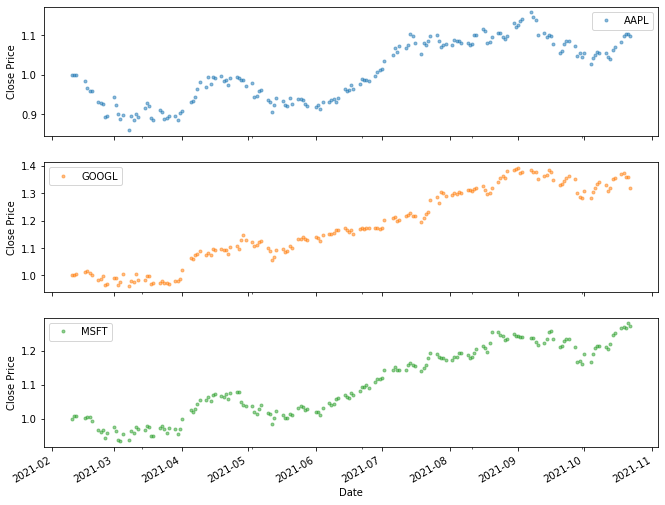

In [8]:
axes = norm_stocks['Close'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Close Price')

***

We can also return just the close prices. Equally, using the same method you can return any column in the panda dataframe. 

**Note**: Our created stock dataframe is a multi-indexed panda dataframe. Don't concern yourself too much with this, we're not expecting you to manipulate the data this way. 

***

In [9]:
close_stocksdf = stocks_df['Close']

In [10]:
close_stocksdf

AAPL        GOOGL        MSFT
Date                                           
2021-02-10  135.389999  2086.479980  242.820007
2021-02-11  135.130005  2088.750000  244.490005
2021-02-12  135.369995  2095.030029  244.990005
2021-02-16  133.190002  2110.699951  243.699997
2021-02-17  130.839996  2118.620117  244.199997
...                ...          ...         ...
2021-10-18  146.550003  2855.560059  307.290009
2021-10-19  148.759995  2864.739990  308.230011
2021-10-20  149.259995  2835.379883  307.410004
2021-10-21  149.479996  2837.719971  310.760010
2021-10-22  148.690002  2751.330078  309.160004

[178 rows x 3 columns]

In [11]:
close_stocksdf.describe()

AAPL        GOOGL        MSFT
count  178.000000   178.000000  178.000000
mean   136.206573  2459.969609  267.721854
std     10.430721   282.869300   24.715141
min    116.360001  2007.500000  226.729996
25%    126.387497  2252.997498  246.472500
50%    134.464996  2435.689941  261.759995
75%    146.082497  2730.390076  289.775002
max    156.690002  2904.310059  310.760010

***

## C. Your Work

**PART B Etivity2:** 
    
For this part of the etivity choose a stock using the below code. Using that stock data can do the following:

1) Graph and compare the open and close price of a stock. 
> Discuss the changes in price and back up your analysis using some plots
    
2) Create three python functions that return: the max value, the min value and the mean value of stock price
> Do this without using panda max, min, mean functions


In [12]:
tickers = 'AMZN'
stocks_df = yf.download(tickers,
                        start='2021-02-11',
                        end='2021-10-25',
                        progress=False)

### Graph and compare the open and close price of a stock. 
> Discuss the changes in price and back up your analysis using some plots

In [13]:
# Add Close price change over day into dataframe
change_over_day = []
for idx, current_close in enumerate(stocks_df.Close):
    previous_close = current_close if idx == 0 else stocks_df.Close[idx - 1]
    change_percentage = (current_close - previous_close) / previous_close
    change_over_day.append(change_percentage)
stocks_df['Change Over Day'] = change_over_day
stocks_df


Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-02-10  3314.000000  3317.949951  3254.000000  3286.580078  3286.580078   
2021-02-11  3292.000000  3292.000000  3248.060059  3262.129883  3262.129883   
2021-02-12  3250.000000  3280.250000  3233.310059  3277.709961  3277.709961   
2021-02-16  3254.050049  3308.300049  3253.590088  3268.949951  3268.949951   
2021-02-17  3263.600098  3320.909912  3259.500000  3308.639893  3308.639893   
...                 ...          ...          ...          ...          ...   
2021-10-18  3388.360107  3449.169922  3385.100098  3446.739990  3446.739990   
2021-10-19  3434.290039  3454.689941  3422.000000  3444.149902  3444.149902   
2021-10-20  3452.659912  3462.860107  3400.370117  3415.060059  3415.060059   
2021-10-21  3414.250000  3440.280029  3403.000000  3435.010010  3435.010010   
2021-10-22  3421.000000  3429.840088  3331.300049  3335.550049  3335.550049   

             Volume  Change Over Day  
Date                                  
2021-02-10  3151600         0.000000  
2021-02-11  2301400        -0.007439  
2021-02-12  2335300         0.004776  
2021-02-16  2574700        -0.002673  
2021-02-17  3297500         0.012141  
...             ...              ...  
2021-10-18  3174100         0.011065  
2021-10-19  2386100        -0.000751  
2021-10-20  2139800        -0.008446  
2021-10-21  1881400         0.005842  
2021-10-22  3139100        -0.028955  

[178 rows x 7 columns]

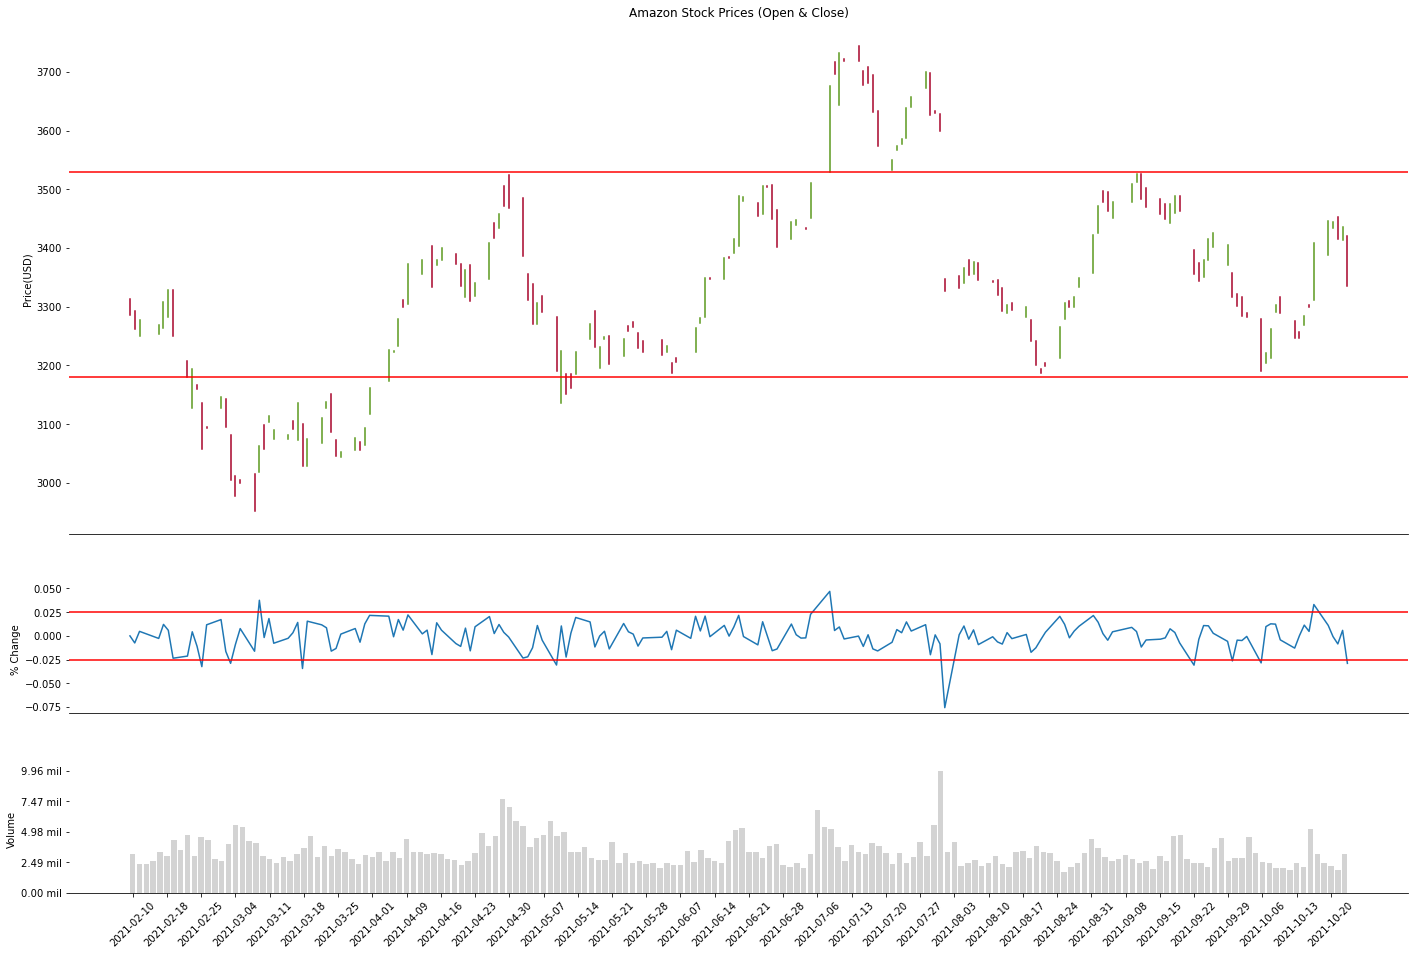

In [46]:
def get_candle_color(open=0, close=0):
    if open == close:
        return '#000000'  # black
    elif open < close:
        return '#59981A'  # green
    else:
        return '#A60027'  # red

data_point_index = np.arange(0, len(stocks_df))

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(24, 16), gridspec_kw={'height_ratios': [4, 1, 1]})

ax1.set_title("Amazon Stock Prices (Open & Close)")
ax1.set_ylabel("Price(USD)")
ax1.set_axisbelow(True)
ax1.set_xticks([])
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
for idx, val in stocks_df.iterrows():
    open, close = val['Open'], val['Close']
    color = get_candle_color(open, close)
    ax1.plot([idx, idx], [open, close], color=color)
ax1.axhline(y=3530, color='r', linestyle='-')
ax1.axhline(y=3180, color='r', linestyle='-')

ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylabel('% Change')
ax2.set_axisbelow(True)
ax2.set_xticks([])
ax2.plot(stocks_df['Change Over Day'])
ax2.axhline(y=0.025, color='r', linestyle='-')
ax2.axhline(y=-0.025, color='r', linestyle='-')

ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_ylabel('Volume')
ax3.bar(data_point_index, stocks_df['Volume'], color='lightgrey')
ax3.set_xticks(data_point_index[::5])
ax3.set_xticklabels([dt.strftime('%Y-%m-%d') for dt in stocks_df.index][::5], rotation=45)
max_vol = stocks_df['Volume'].max()
yticks_ax3 = np.arange(0, max_vol+1, max_vol/4)
yticks_labels_ax3 = ['{:.2f} mil'.format(i/1000000) for i in yticks_ax3]
plt.yticks(yticks_ax3, yticks_labels_ax3)

plt.show()


Above plot is inspired from candlestick graph which is common in stock graphing. <br>
There are two supporting sub graphs:
1. Line chart shows the percentage change of daily close price
2. Bar chart shows the daily volume

A candle in traditional candlestick graph usually contains 4 data points: Open, Close, High, Low. <br>
But in our graph above, a candle usues two data points: Open & Close (required by the task). <br>
Notes: <br>
- A bar/candle represents the open and close price for 1 day <br>
- Candle is red if open is higher than close: price increase for the day <br>
- Candle is green if close is higher than open: price decrease for the day <br>

General Interpretation of the stock graph <br>
P.S. I will not try to find any historical financial events to support my discussion as this is not a Financial Analyst Course(stated in 'Lessons') <br>

Price staled around 3180 to 3530 range with a few small breaches in Mar, Apr and Jul. Most likely due to the lack of significant economic/business events. <br>

If we try to dip a little into Technical Analysis, we can see that:<br>
1. Approx 3180 is a good support after June, price bounced back up at this support line in mid Aug and early Oct. 
2. Approx 3530 is worked as a support/resistance since May.

Candlestick chart allows us to see gaps between previous day's close price and today's open price. <br>
As we can see, in late July, we had a big gap between close and open. This could be due to a bad earning report or bad economic event or natual disaster. <br>

On top of the stock price(open & close) candlestick charts. We also have two supporting graphs. <br>
1. % Change Graph: Daily % change of close price. <br>
The reason % change is not calculated using (close-open)/open is because this approach might miss out price gap between days. <br>
And ignoring price gaps can be misleading when market is volatile. <br>
As we can see, the price changes between days usually stay around +/-0.25%. And there are two big daily price change(outside of the range) at around early Jul and early Aug. <br>
This aligns well with the price changes in candlestick charts.
2. Volume Graph: Daily stock trading volume chart. <br>
In technical analysis, volume chart provides insights to validity of price change. Price change is more likely last if volume is higher that usual. <br>

### Create three python functions that return: the max value, the min value and the mean value of stock price
> Do this without using panda max, min, mean functions

#### Mean Function

In [15]:
def get_mean(data_frame):
    mean_by_cols = []
    for col in data_frame:
        values = data_frame[col]
        mean = sum(values)/len(values)
        mean_by_cols.append(mean)
    return pd.DataFrame([mean_by_cols], index=["mean"], columns=data_frame.columns)

print('--- Calculated Mean Stock Prices ---')
print(stocks_df.describe().loc[['mean']])
print('')
print('--- Pandas Mean Stock Prices ---')
print(get_mean(stocks_df))


--- Calculated Mean Stock Prices ---
             Open         High          Low        Close    Adj Close  \
mean  3330.272534  3359.807694  3297.931853  3328.930615  3328.930615   

            Volume  Change Over Day  
mean  3.320967e+06          0.00019  

--- Pandas Mean Stock Prices ---
             Open         High          Low        Close    Adj Close  \
mean  3330.272534  3359.807694  3297.931853  3328.930615  3328.930615   

            Volume  Change Over Day  
mean  3.320967e+06          0.00019  


In [16]:
def get_max(data_frame):
    max_by_cols = []
    for col in data_frame:
        values = data_frame[col]
        max_by_cols.append(max(values))
    return pd.DataFrame([max_by_cols], index=["max"], columns=data_frame.columns)


print('--- Calculated Max Stock Prices ---')
print(stocks_df.describe().loc[['max']])
print('')
print('--- Pandas Max Stock Prices ---')
print(get_max(stocks_df))


--- Calculated Max Stock Prices ---
       Open         High          Low        Close    Adj Close     Volume  \
max  3744.0  3773.080078  3696.790039  3731.409912  3731.409912  9957100.0   

     Change Over Day  
max         0.046927  

--- Pandas Max Stock Prices ---
       Open         High          Low        Close    Adj Close   Volume  \
max  3744.0  3773.080078  3696.790039  3731.409912  3731.409912  9957100   

     Change Over Day  
max         0.046927  


In [17]:
def get_min(data_frame):
    min_by_cols = []
    for col in data_frame:
        values = data_frame[col]
        min_by_cols.append(min(values))
    return pd.DataFrame([min_by_cols], index=["min"], columns=data_frame.columns)


print('--- Calculated Max Stock Prices ---')
print(stocks_df.describe().loc[['min']])
print('')
print('--- Pandas Max Stock Prices ---')
print(get_min(stocks_df))


--- Calculated Max Stock Prices ---
       Open    High     Low        Close    Adj Close     Volume  \
min  3005.0  3009.0  2881.0  2951.949951  2951.949951  1680300.0   

     Change Over Day  
min        -0.075649  

--- Pandas Max Stock Prices ---
       Open    High     Low        Close    Adj Close   Volume  \
min  3005.0  3009.0  2881.0  2951.949951  2951.949951  1680300   

     Change Over Day  
min        -0.075649  
